In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

pd.set_option('max_columns', None)

In [2]:
MaStRWind = pd.read_parquet("MaStRWind.parquet")
MaStRWind.describe()

,NetzbetreiberpruefungStatus,Land,Gemeindeschluessel,Postleitzahl,StrasseNichtGefunden,Hausnummer_nv,HausnummerNichtGefunden,Laengengrad,Breitengrad,EinheitSystemstatus,EinheitBetriebsstatus,NichtVorhandenInMigriertenEinheiten,Weic_nv,Kraftwerksnummer_nv,Bruttoleistung,Nettonennleistung,AnschlussAnHoechstOderHochSpannung,FernsteuerbarkeitNb,FernsteuerbarkeitDv,FernsteuerbarkeitDr,Einspeisungsart,Nabenhoehe,Rotordurchmesser,Rotorblattenteisungssystem,AuflageAbschaltungLeistungsbegrenzung,AuflagenAbschaltungSchallimmissionsschutzNachts,AuflagenAbschaltungSchallimmissionsschutzTagsueber,AuflagenAbschaltungSchattenwurf,AuflagenAbschaltungTierschutz,AuflagenAbschaltungEiswurf,AuflagenAbschaltungSonstige,Nachtkennzeichnung,Seelage,ClusterNordsee,Wassertiefe,Kuestenentfernung,Buergerenergie,ClusterOstsee,Anlagenzahl
count,34142.000000,34142.0,3.246400e+04,32464.000000,33265.000000,33265.000000,33265.000000,33265.000000,33265.000000,34142.0,34142.000000,34142.0,34142.000000,34142.000000,34142.000000,34142.000000,24956.000000,33230.000000,31794.000000,31345.000000,33386.000000,33291.000000,33688.000000,25325.000000,32692.000000,11342.000000,11204.000000,11337.000000,11356.000000,11211.000000,11049.000000,1111.000000,1678.000000,1370.000000,1544.000000,1544.000000,634.000000,308.000000,34142.0
mean,0.878039,84.0,7.792899e+06,35270.581044,0.037457,0.056185,0.054862,9.969614,52.297219,472.0,34.814539,0.0,0.417667,0.000322,2324.493345,2324.493345,0.369811,0.966085,0.943669,0.533706,688.059965,98.282182,86.339991,0.111076,0.507372,0.437753,0.079525,0.729470,0.581103,0.537686,0.147434,0.673267,639.816448,1599.072993,29.735374,38.686683,0.066246,1541.081169,1.0
std,0.327246,0.0,4.841446e+06,23287.291062,0.189881,0.230282,0.227715,2.308017,1.542554,0.0,1.135882,0.0,0.493182,0.017947,1600.463640,1600.463640,0.482763,0.181013,0.230564,0.498871,0.237426,34.518629,34.988659,0.314232,0.499953,0.496132,0.270569,0.444253,0.493400,0.498600,0.354554,0.469230,0.387234,259.995891,7.840260,15.544234,0.248908,1.047676,0.0
min,0.000000,84.0,1.001000e+06,1067.000000,0.000000,0.000000,0.000000,-3.622044,46.092507,472.0,31.000000,0.0,0.000000,0.000000,0.120000,0.120000,0.000000,0.000000,0.000000,0.000000,688.000000,0.360000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,639.000000,1547.000000,1.320000,6.495000,0.000000,1540.000000,1.0
25%,1.000000,84.0,3.451008e+06,18330.500000,0.000000,0.000000,0.000000,8.098458,51.324873,472.0,35.000000,0.0,0.000000,0.000000,1500.000000,1500.000000,0.000000,1.000000,1.000000,0.000000,688.000000,70.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,640.000000,1548.000000,23.790000,29.287500,0.000000,1540.000000,1.0
50%,1.000000,84.0,6.633023e+06,27347.500000,0.000000,0.000000,0.000000,9.484986,52.382993,472.0,35.000000,0.0,0.000000,0.000000,2000.000000,2000.000000,0.000000,1.000000,1.000000,1.000000,688.000000,98.000000,82.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,640.000000,1550.000000,28.200000,33.670000,0.000000,1541.000000,1.0
75%,1.000000,84.0,1.207205e+07,48565.000000,0.000000,0.000000,0.000000,11.861002,53.498102,472.0,35.000000,0.0,1.000000,0.000000,3050.000000,3050.000000,1.000000,1.000000,1.000000,1.000000,688.000000,130.135000,115.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,640.000000,1551.000000,38.700000,55.500000,0.000000,1542.000000,1.0
max,1.000000,84.0,1.607705e+07,99996.000000,1.000000,1.000000,1.000000,16.593999,60.003844,472.0,38.000000,0.0,1.000000,1.000000,20000.000000,20000.000000,1.000000,1.000000,1.000000,1.000000,689.000000,200.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,640.000000,2963.000000,60.810000,66.510000,1.000000,1543.000000,1.0


In [3]:
MaStRWind = MaStRWind[MaStRWind['Inbetriebnahmedatum'].notna()]
MaStRWind["Inbetriebnahmejahr"] = MaStRWind['Inbetriebnahmedatum'].dt.year
MaStRWind["Inbetriebnahmemonat"] = MaStRWind['Inbetriebnahmedatum'].dt.month
MaStRWind["Inbetriebnahmewochentag"] = MaStRWind['Inbetriebnahmedatum'].dt.day_of_week

MaStRWind["Bundesland"] = MaStRWind["Bundesland"].cat.rename_categories({"1416":"Seelage"})
#MaStRWind["Inbetriebnahmewochentag"] = MaStRWind["Inbetriebnahmewochentag"].replace({0:"Montag",1:"Dienstag",2:"Mittwoch",3:"Donnerstag",4:"Freitag",5:"Samstag",6:"Sonntag"})

<AxesSubplot:>

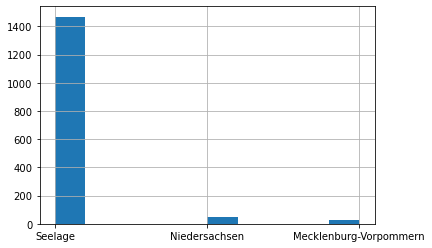

In [4]:
MaStRWind.loc[MaStRWind["Lage"]=="Windkraft auf See","Bundesland"].hist()

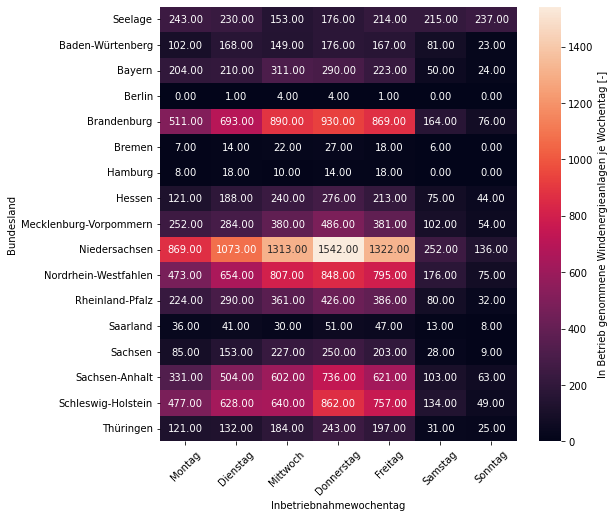

In [5]:
MaStRWind_grouped = MaStRWind.loc[MaStRWind["Inbetriebnahmejahr"]>1990].groupby(["Bundesland","Inbetriebnahmewochentag"]).sum()["Anlagenzahl"].reset_index()
#MaStRWind_grouped["Anlagenzahl"] = MaStRWind_grouped["Anlagenzahl"] / 1000000
MaStRWind_grouped_pivot = MaStRWind_grouped.pivot(columns='Inbetriebnahmewochentag',index='Bundesland',values='Anlagenzahl')

wochentage = ["Montag","Dienstag","Mittwoch","Donnerstag","Freitag","Samstag","Sonntag"]

plt.figure(figsize=(8,8))
ax = sns.heatmap(MaStRWind_grouped_pivot, annot=True, fmt=".2f", cbar_kws={'label': 'In Betrieb genommene Windenergieanlagen je Wochentag [-]'})
ax.set_xticklabels(wochentage)
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:xlabel='Inbetriebnahmejahr', ylabel='Bundesland'>

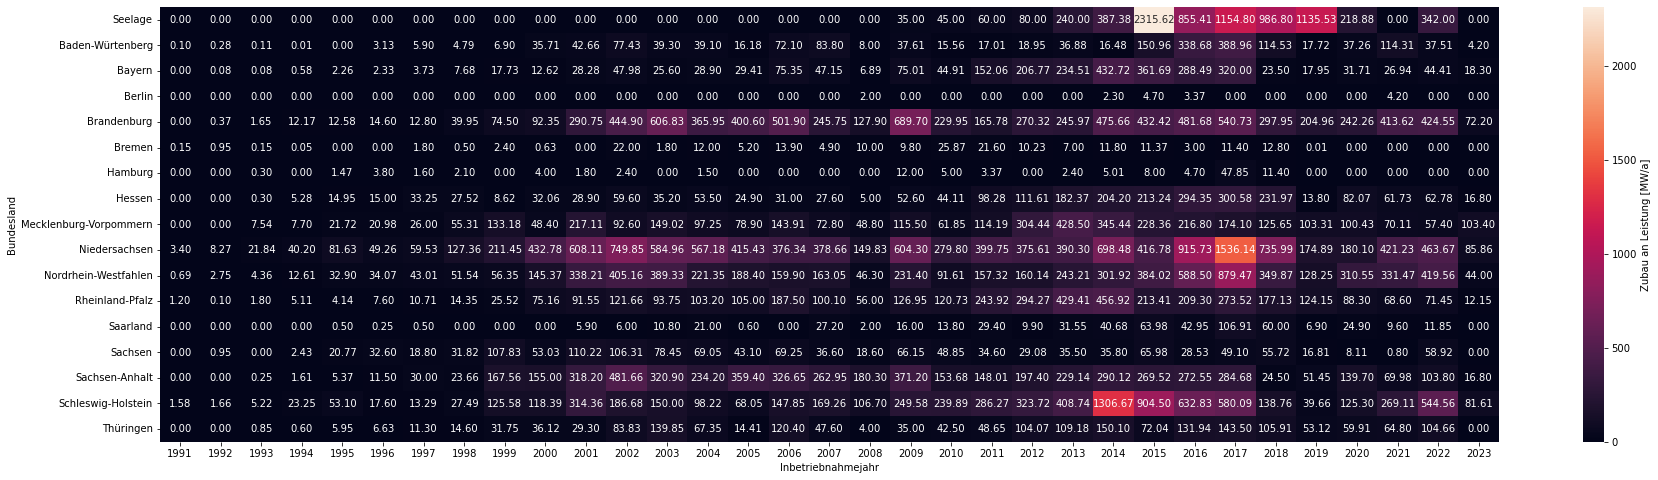

In [6]:
MaStRWind_grouped = MaStRWind.loc[MaStRWind["Inbetriebnahmejahr"]>1990].groupby(["Bundesland","Inbetriebnahmejahr"]).sum()["Nettonennleistung"].reset_index()
MaStRWind_grouped["Nettonennleistung"] = MaStRWind_grouped["Nettonennleistung"] / 1000
MaStRWind_grouped_pivot = MaStRWind_grouped.pivot(columns='Inbetriebnahmejahr',index='Bundesland',values='Nettonennleistung')

plt.figure(figsize=(30,8))
sns.heatmap(MaStRWind_grouped_pivot, annot=True, fmt=".2f", cbar_kws={'label': 'Zubau an Leistung [MW/a]'})

<AxesSubplot:xlabel='Laengengrad', ylabel='Breitengrad'>

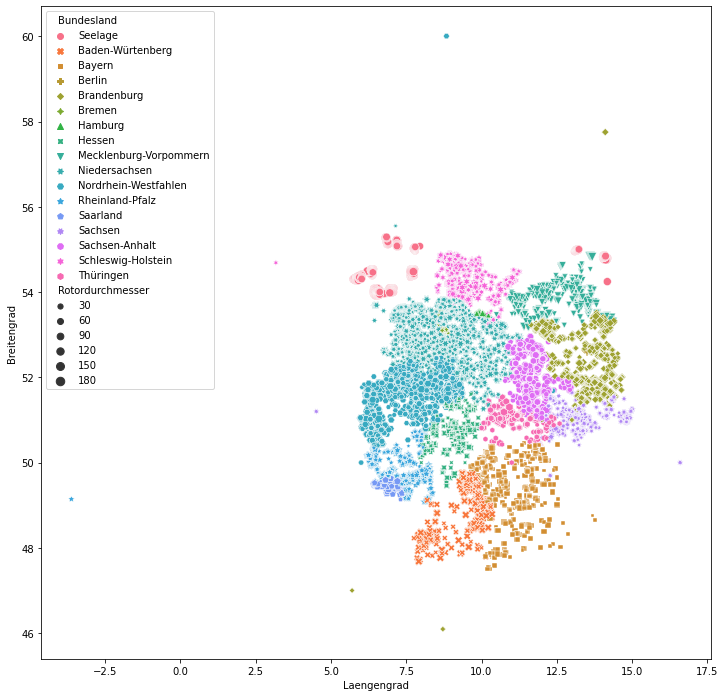

In [12]:
plt.figure(figsize=(12,12))
sns.scatterplot(
    data=MaStRWind.loc[MaStRWind["Inbetriebnahmejahr"]>1990], 
    x="Laengengrad", y="Breitengrad", 
    hue="Bundesland", size="Rotordurchmesser", style="Bundesland", 
    palette="husl"
)

<AxesSubplot:xlabel='Laengengrad', ylabel='Breitengrad'>

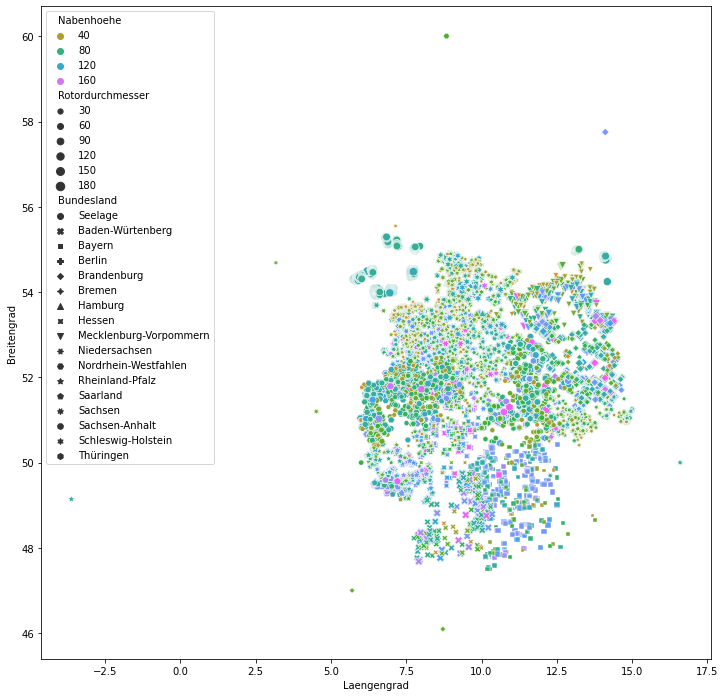

In [13]:
plt.figure(figsize=(12,12))
sns.scatterplot(
    data=MaStRWind.loc[MaStRWind["Inbetriebnahmejahr"]>1990], 
    x="Laengengrad", y="Breitengrad", 
    hue="Nabenhoehe", size="Rotordurchmesser", style="Bundesland", 
    palette="husl"
)

<Figure size 1296x1152 with 0 Axes>

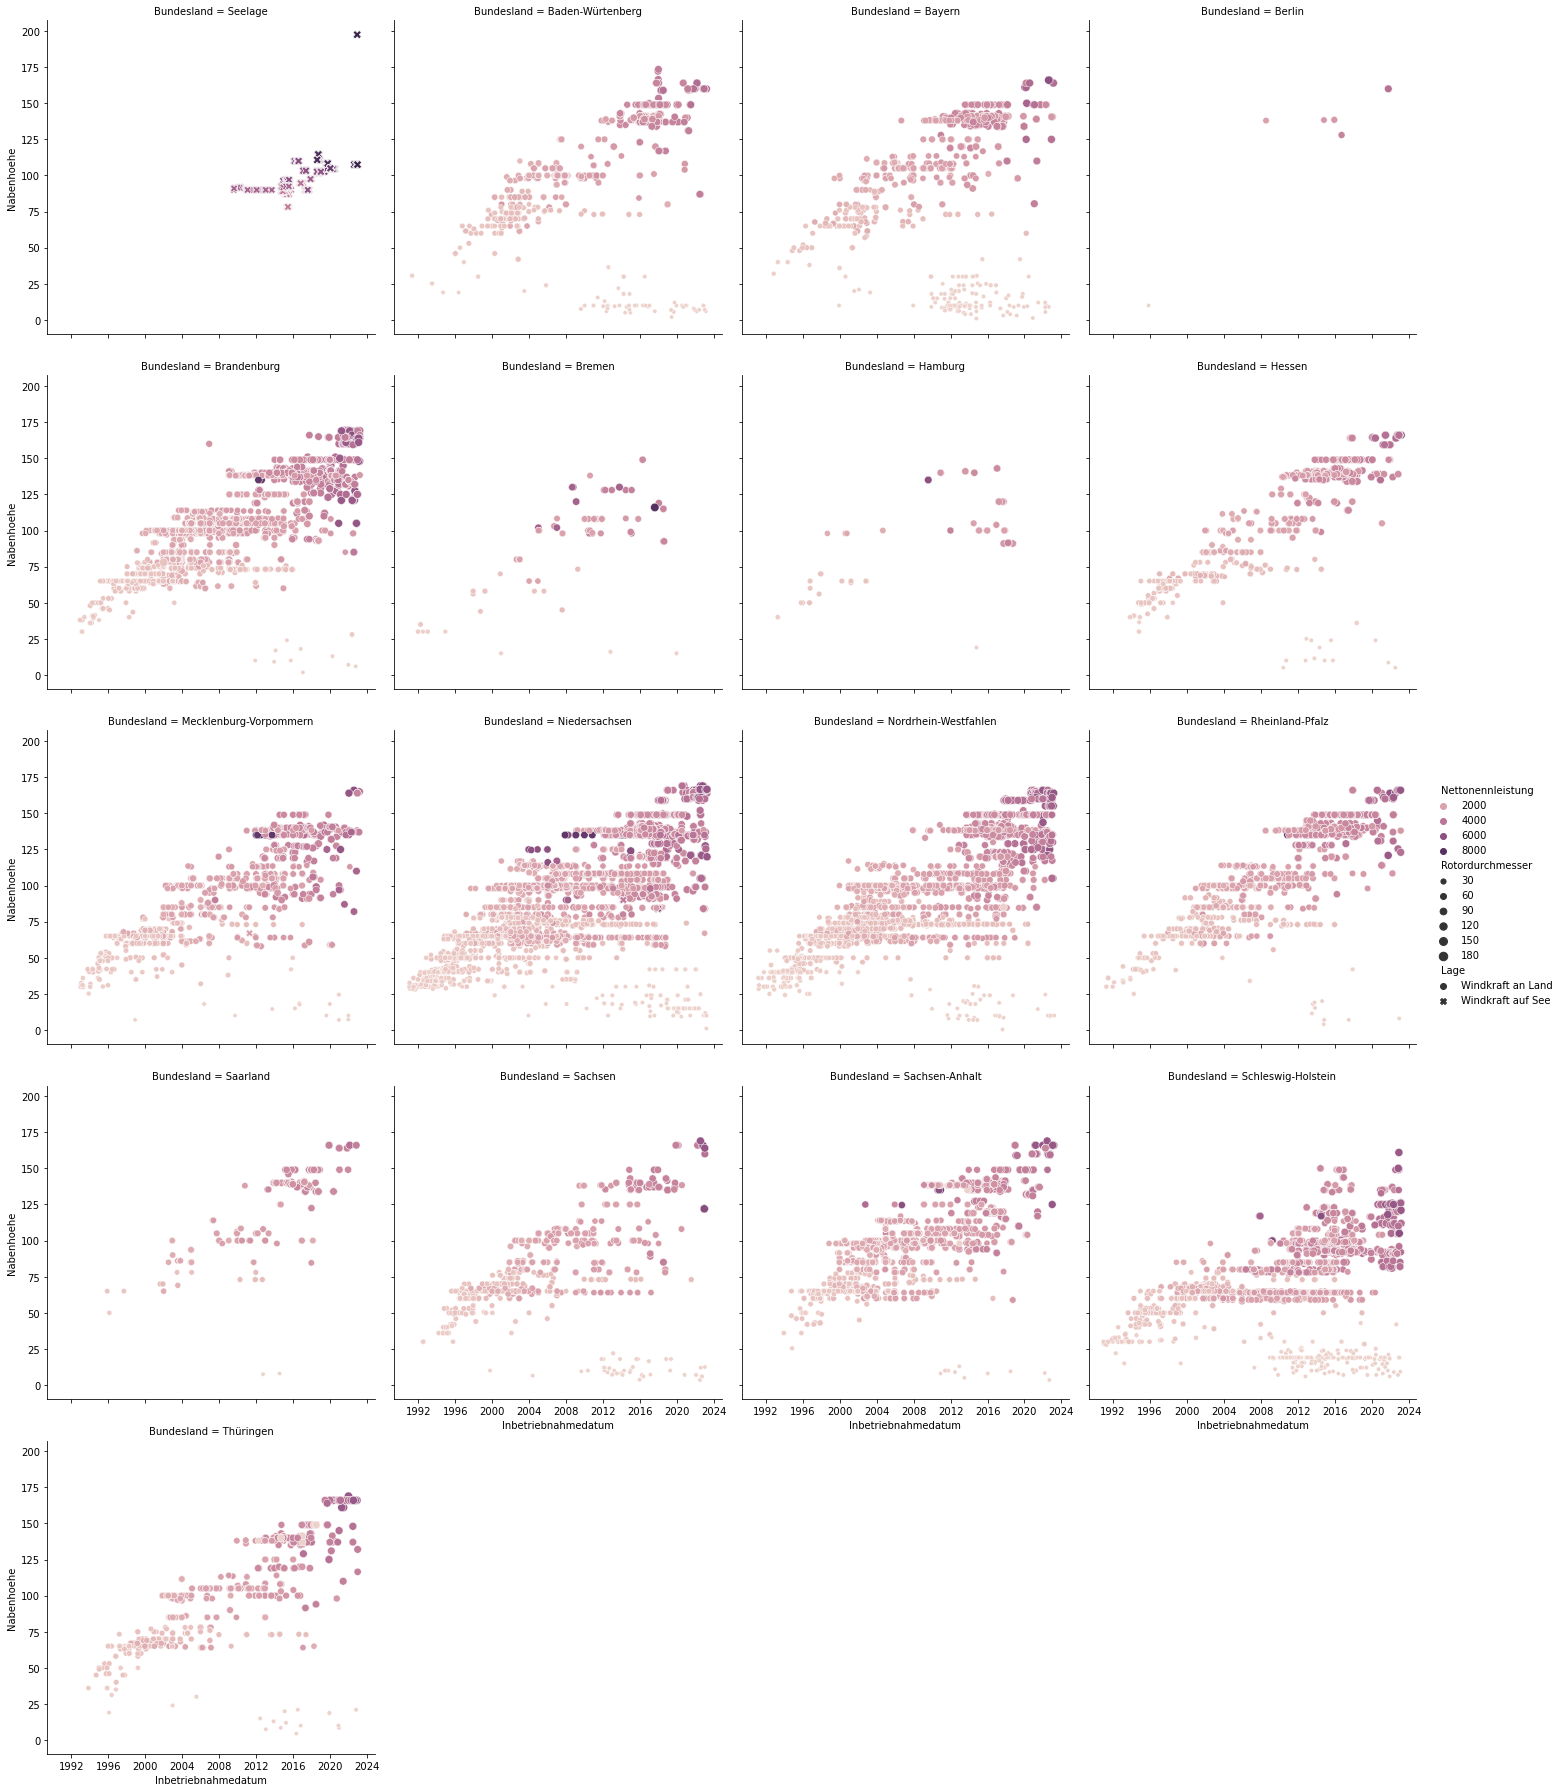

In [16]:
plt.figure(figsize=(18,16))
sns.relplot(
    data=MaStRWind.loc[MaStRWind["Inbetriebnahmejahr"]>1990], 
    x="Inbetriebnahmedatum", y="Nabenhoehe",
    col="Bundesland", hue="Nettonennleistung", size="Rotordurchmesser",
    style="Lage", kind="scatter", col_wrap=4
)

<AxesSubplot:xlabel='Inbetriebnahmedatum', ylabel='Nabenhoehe'>

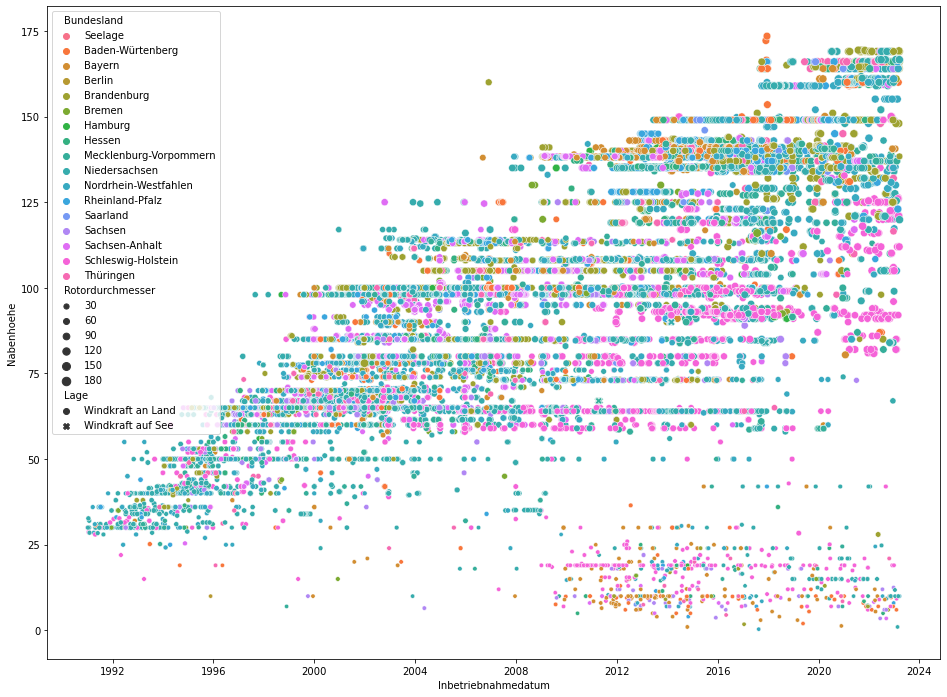

In [14]:
plt.figure(figsize=(16,12))
sns.scatterplot(
    data=MaStRWind.loc[(MaStRWind["Inbetriebnahmejahr"]>1990) & (MaStRWind["Bundesland"]!="Seelage")], 
    x="Inbetriebnahmedatum", y="Nabenhoehe", 
    hue="Bundesland", size="Rotordurchmesser"
)

In [10]:
#import plotly.express as px
#import plotly.graph_objects as go

#fig = go.Figure(px.scatter_mapbox(MaStRWind, 
#            lat="Breitengrad", 
#            lon="Laengengrad", 
#            color="Nettonennleistung", #"Rotordurchmesser","Nabenhöhe",
#            hover_name="EinheitMastrNummer", 
#            hover_data=["Inbetriebnahmedatum","Hersteller","Typenbezeichnung", "Nettonennleistung"],
#            color_continuous_scale="jet", 
#            zoom=4,
#            height=900,
#            mapbox_style="open-street-map"))
#            
#
#fig.update_layout(margin = {'l':0, 'r':0, 'b':0, 't':0})
#
#fig.show()